<a href="https://colab.research.google.com/github/Pradyuman-Singh-Kandari/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries**


In [ ]:
import tweepy 
from textblob import TextBlob 
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
# giving graph a style  
plt.style.use('fivethirtyeight')

## **API credentials**





In [ ]:
consumerKey = '*************************'
consumerSecret = '*********************************************'
accessToken = '********************************************'
accessTokenSecret = '***********'

## **Authentication**

In [ ]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit = True)

## **Extract Tweets**

In [ ]:
posts = api.user_timeline(screen_name="Extra_2_AB", count = 100, lang = "en", tweet_mode = "extended")
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ')' + tweet.full_text + '\n')
  i = i + 1

Show the 5 recent tweets: 

1)RT @HindenburgRes: They were essentially fresh out of school, hardly in a position to scrutinize and hold to account the financials of some…

2)RT @HindenburgRes: The audit partners at Shah Dhandharia who respectively signed off on Adani Enterprises and Adani Gas’ annual audits were…

3)RT @TheWeekLive: FROM THE MAGAZINE | @surajyengde’s extraordinary trajectory is worthy of a full length film, starting with his life in a s…

4)Yaar tu kya chutiya admi hai bhai, opportunist and centrist like you can never reclaim the idea of republic https://t.co/sPv9kkmIyA

5)RT @motherboard: Twitter is censoring links to a BBC documentary that examined Prime Minister Modi's role in violent 2002 riots that saw ov…



## **Creating DataFrame**

In [ ]:
df = pd.DataFrame( [tweet.full_text for tweet in posts] , columns = ['Tweets'])
df.head()

,Tweets
0,RT @HindenburgRes: They were essentially fresh...
1,RT @HindenburgRes: The audit partners at Shah ...
2,RT @TheWeekLive: FROM THE MAGAZINE | @surajyen...
3,"Yaar tu kya chutiya admi hai bhai, opportunist..."
4,RT @motherboard: Twitter is censoring links to...


## **Cleaning**

In [ ]:
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text)
  text = re.sub(r'#','',text)
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'https?:\/\/S+','',text)
  return text

In [ ]:
df['Tweets'] = df['Tweets'].apply(cleanTxt)

In [ ]:
df

,Tweets,Subjectivity,Polarity
0,": They were essentially fresh out of school, h...",0.520833,0.004167
1,: The audit partners at Shah Dhandharia who re...,0.100000,0.000000
2,: FROM THE MAGAZINE | ’s extraordinary traject...,0.662500,0.254167
3,"Yaar tu kya chutiya admi hai bhai, opportunist...",0.000000,0.000000
4,: Twitter is censoring links to a BBC document...,0.500000,-0.400000
...,...,...,...
95,"No adequate gear, no safety protocols being fo...",0.491667,0.091667
96,": ""Is your caste more important than your daug...",0.750000,0.450000
97,": ""When a woman thinks that an Indian man migh...",0.983333,0.366667
98,_gluten: What a joy to see Brahminism wrapped ...,0.200000,0.800000


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,": They were essentially fresh out of school, h...",0.520833,0.004167
1,: The audit partners at Shah Dhandharia who re...,0.100000,0.000000
2,: FROM THE MAGAZINE | ’s extraordinary traject...,0.662500,0.254167
3,"Yaar tu kya chutiya admi hai bhai, opportunist...",0.000000,0.000000
4,: Twitter is censoring links to a BBC document...,0.500000,-0.400000
...,...,...,...
95,"No adequate gear, no safety protocols being fo...",0.491667,0.091667
96,": ""Is your caste more important than your daug...",0.750000,0.450000
97,": ""When a woman thinks that an Indian man migh...",0.983333,0.366667
98,_gluten: What a joy to see Brahminism wrapped ...,0.200000,0.800000


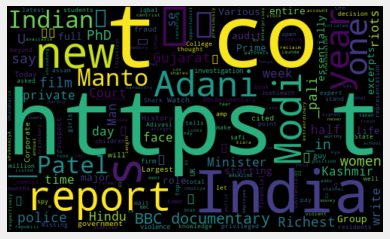

In [ ]:
allWords = ' '.join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,": They were essentially fresh out of school, h...",0.520833,0.004167,Positive
1,: The audit partners at Shah Dhandharia who re...,0.100000,0.000000,Neutral
2,: FROM THE MAGAZINE | ’s extraordinary traject...,0.662500,0.254167,Positive
3,"Yaar tu kya chutiya admi hai bhai, opportunist...",0.000000,0.000000,Neutral
4,: Twitter is censoring links to a BBC document...,0.500000,-0.400000,Negative
...,...,...,...,...
95,"No adequate gear, no safety protocols being fo...",0.491667,0.091667,Positive
96,": ""Is your caste more important than your daug...",0.750000,0.450000,Positive
97,": ""When a woman thinks that an Indian man migh...",0.983333,0.366667,Positive
98,_gluten: What a joy to see Brahminism wrapped ...,0.200000,0.800000,Positive


In [ ]:
j = 1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j = j + 1

1): They were essentially fresh out of school, hardly in a position to scrutinize and hold to account the financials of some…

2): FROM THE MAGAZINE | ’s extraordinary trajectory is worthy of a full length film, starting with his life in a s…

3):  
Various excerpts from FinalSolution + the entire film available on this channel, with the mandatory CBFC ce…

4): NEW FROM US: 

Adani Group – How The World’s 3rd Richest Man Is Pulling The Largest Con In Corporate History

https://t.…

5): Soon we will release a report on what we strongly suspect to be the largest corporate fraud in history.

6)The bbc documentary has unveiled the cloak of ignorance for the lover’s of gujarat model which exclusively relies on “Us v/s Them”. Brilliant

7): More Modi censorship: "India has blocked the airing of a BBC documentary which questioned Prime Minister Narendra Modi's leade…

8)Wonder, how does one dust off thoughts that take so much of headspace 😩

9): The protest of the women wrestlers in pathbreak

In [ ]:
j = 1
sortedDF = df.sort_values(by = ['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j = j + 1

1): Twitter is censoring links to a BBC documentary that examined Prime Minister Modi's role in violent 2002 riots that saw ov…

2): The Adani Group has previously been the focus of 4 major government fraud investigations which have alleged money launde…

3)_in: According to Human Rights Watch, cited in the film, over three and a half years between May 2015 and December 2018, cow vig…

4)__Patel: this is the firm that undid nikola  https://t.co/GwuX9qecQh

5): A BBC documentary shows "raw and chilling footage" of how in 2002 under Modi, then chief minister of Gujarat, "the police stoo…

6): The BBCDocumentary flies in the face of Modi's 20-year-long, and let's face it, very expensive whitewashing exercise. Aut…

7): Don't have the energy to rage at this but it is common scholarly knowledge that the Mahabharata did grow out of Brahmanicia…

8): United Kingdom conducted an inquiry into the 2002 Gujarat riots when Jack Straw was the Foreign Secretary. BBC makes startli…

9)__Patel: “Aroun

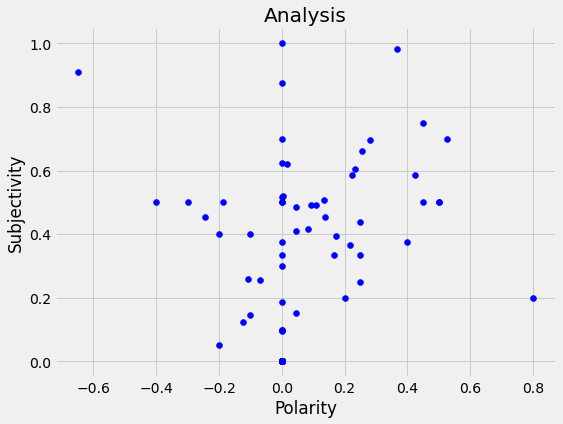

In [ ]:
plt.figure(figsize = (8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0])*100 , 1)

31.0

In [ ]:
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0])*100 , 1)

12.0

In [ ]:
ptweets = df[df.Analysis == 'Neutral']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0])*100 , 1)

57.0

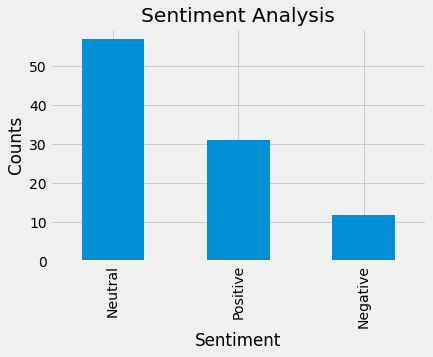

In [ ]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
